# Explore

## Load data

In [1]:
import pandas as pd

In [2]:
def get_df(path: str) -> pd.DataFrame:
    with open(path, 'r') as file:
        content = file.readlines()
    data = [line[:-1].split('\t') for line in content]
    df = pd.DataFrame(data=data, columns=['TITLE', 'CATEGORY'])
    # df.set_index('ID', inplace=True, drop=True)
    return df

train_df = get_df('data/train.txt')
val_df = get_df('data/valid.txt')
test_df = get_df('data/test.txt')

## Statistics on the number of samples for each label

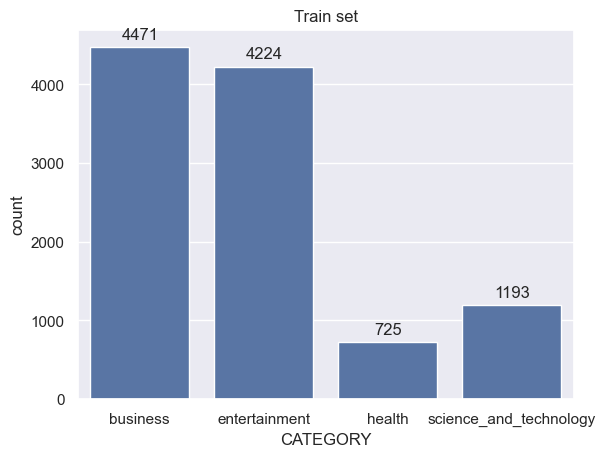

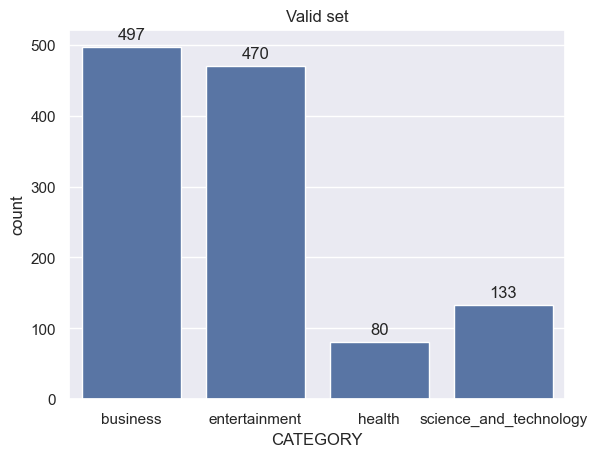

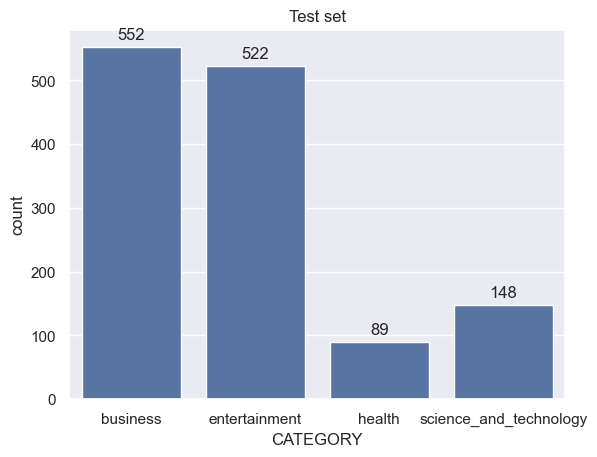

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def word_count(df: pd.DataFrame, set: str) -> None:
    sorted_df = df.sort_values(by='CATEGORY')
    sns.set(style="darkgrid")
    ax = sns.countplot(x='CATEGORY', data=sorted_df)

    # Adding count numbers on top of each column
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    plt.title(set)
    plt.show()

word_count(train_df, 'Train set')
word_count(val_df, 'Valid set')
word_count(test_df, 'Test set')


## Word count

In [4]:
train_df['n_words'] = train_df['TITLE'].apply(lambda x: len(x.split()))
val_df['n_words'] = train_df['TITLE'].apply(lambda x: len(x.split()))
test_df['n_words'] = train_df['TITLE'].apply(lambda x: len(x.split()))

In [5]:
merged_df = pd.concat([train_df.describe(), val_df.describe(), test_df.describe()], axis=1)

merged_df.columns = ['train', 'valid', 'test']

merged_df

,train,valid,test
count,10613.000000,1180.00000,1311.000000
mean,10.453595,10.50000,10.504958
std,2.338657,2.40846,2.402562
min,2.000000,2.00000,2.000000
25%,9.000000,9.00000,9.000000
50%,10.000000,10.00000,10.000000
75%,12.000000,12.00000,12.000000
max,20.000000,19.00000,19.000000
